In [1]:
import sys
sys.path.insert(0, r'C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy')
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
geo_model = gp.create_model('Prox_Kirchbichl_easy_Strat')

In [3]:
gp.init_data(geo_model, [4466600,4500000.,5280000,5300000.,-3000,2000.],[100,100,100],
            path_o = 'C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models/data/True_Boundary_Sets/Prox_Kirchbichl_easy_Strat/orientations_Prox_Kirchbichl_easy_Strat.csv',
            path_i = 'C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models/data/True_Boundary_Sets/Prox_Kirchbichl_easy_Strat/Points_Prox_Kirchbichl_easy_Strat.csv', default_values=True);

Active grids: ['regular']


In [4]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,4467249.179,5291197.496,672.036962,0.305337,0.475283,0.514848,Baustein Beds,Default series,1,1,1.000000e-08
1,4468277.473,5290691.389,704.486260,0.317719,0.469189,0.515239,Baustein Beds,Default series,1,1,1.000000e-08
2,4472008.151,5290197.705,768.049430,0.362641,0.463244,0.516004,Baustein Beds,Default series,1,1,1.000000e-08
3,4473729.137,5290046.892,875.499077,0.383364,0.461428,0.517298,Baustein Beds,Default series,1,1,1.000000e-08
4,4474006.099,5292147.082,747.446767,0.386699,0.486717,0.515756,Baustein Beds,Default series,1,1,1.000000e-08


In [5]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,4466913.000,5290477.988,655.0,0.301289,0.466619,0.514643,0.166061,0.941776,-0.292372,73,190,-1,Baustein Beds,Default series,1,1,0.01
1,4466936.202,5291480.442,655.0,0.301568,0.478690,0.514643,0.750000,-0.433013,0.500000,60,120,1,Baustein Beds,Default series,1,1,0.01
2,4467174.513,5291634.748,670.0,0.304438,0.480548,0.514824,0.719846,-0.604023,0.342020,70,130,1,Baustein Beds,Default series,1,1,0.01
3,4468019.499,5290564.385,680.0,0.314613,0.467660,0.514944,0.172354,0.977467,-0.121869,83,190,-1,Baustein Beds,Default series,1,1,0.01
4,4473494.152,5289945.627,800.0,0.380535,0.460209,0.516389,0.078990,0.902859,0.422618,65,5,1,Baustein Beds,Default series,1,1,0.01


In [6]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,Baustein Beds,Default series,1,False,#015482,1
1,Helvetics_Base_Thrust,Default series,2,False,#9f0052,2
2,Kirchbichl_Thrust_proximal,Default series,3,False,#ffbe00,3
3,Leitzach_Thrust,Default series,4,False,#728f02,4
4,Lower Bunte Molasse,Default series,5,False,#443988,5
5,Lower Chattian Coal FM,Default series,6,False,#ff3f20,6
6,Muehlau_Thrust,Default series,7,False,#325916,7
7,basement,Basement,1,True,#5DA629,8


In [7]:
gp.map_series_to_surfaces(geo_model,
                            {"Kirchbichl_Thrust_proximal":('Kirchbichl_Thrust_proximal'),
                             "Helvetics_Thrust":('Helvetics_Base_Thrust'),
                             "Muehlau_Thrust":('Muehlau_Thrust'),
                             "Leitzach_Thrust":('Leitzach_Thrust'),                       
                             "Molasse": ('Lower Bunte Molasse','Lower Chattian Coal FM','Baustein Beds','basement')},remove_unused_series=True);

In [8]:
geo_model.set_is_fault(['Helvetics_Thrust','Kirchbichl_Thrust_proximal','Muehlau_Thrust','Leitzach_Thrust'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Kirchbichl_Thrust_proximal,True,False
Helvetics_Thrust,True,False
Muehlau_Thrust,True,False
Leitzach_Thrust,True,False
Molasse,False,False


In [9]:
geo_model.series

,order_series,BottomRelation
Kirchbichl_Thrust_proximal,1,Fault
Helvetics_Thrust,2,Fault
Muehlau_Thrust,3,Fault
Leitzach_Thrust,4,Fault
Molasse,5,Erosion


In [10]:
geo_model.faults.faults_relations_df

,Kirchbichl_Thrust_proximal,Helvetics_Thrust,Muehlau_Thrust,Leitzach_Thrust,Molasse
Kirchbichl_Thrust_proximal,False,False,False,False,True
Helvetics_Thrust,False,False,False,False,True
Muehlau_Thrust,False,False,False,False,True
Leitzach_Thrust,False,False,False,False,True
Molasse,False,False,False,False,False


In [11]:
fr = np.zeros((5,5))
fr[0,4] = True
fr[1,4] = True
fr[2,4] = True
fr[3,4] = True

fr[0,3] = True
fr[0,2] = True
fr[0,1] = True


fr[1,2] = True
fr[1,3] = True

fr[2,3] = True


geo_model.faults.set_fault_relation(fr)

,Kirchbichl_Thrust_proximal,Helvetics_Thrust,Muehlau_Thrust,Leitzach_Thrust,Molasse
Kirchbichl_Thrust_proximal,False,True,True,True,True
Helvetics_Thrust,False,False,True,True,True
Muehlau_Thrust,False,False,False,True,True
Leitzach_Thrust,False,False,False,False,True
Molasse,False,False,False,False,False


In [12]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
2,Kirchbichl_Thrust_proximal,Kirchbichl_Thrust_proximal,1,False,#527682,1
1,Helvetics_Base_Thrust,Helvetics_Thrust,1,False,#527682,2
6,Muehlau_Thrust,Muehlau_Thrust,1,False,#527682,3
3,Leitzach_Thrust,Leitzach_Thrust,1,False,#527682,4
0,Baustein Beds,Molasse,1,False,#015482,5
4,Lower Bunte Molasse,Molasse,2,False,#443988,6
5,Lower Chattian Coal FM,Molasse,3,False,#ff3f20,7
7,basement,Molasse,4,True,#5DA629,8


In [13]:
new_colors={'Baustein Beds':'#e8e402', 'Lower Chattian Coal FM':'#9e5f00','Lower Bunte Molasse':'#ff7700','basement':'#000000','Helvetics_Base_Thrust':'#24deff','Leitzach_Thrust':'#0081d6','Muehlau_Thrust':'#0015d6','Kirchbichl_Thrust_proximal':'#a800d6'}
geo_model.surfaces.colors.change_colors(new_colors)

,surface,series,order_surfaces,isBasement,color,id
2,Kirchbichl_Thrust_proximal,Kirchbichl_Thrust_proximal,1,False,#a800d6,1
1,Helvetics_Base_Thrust,Helvetics_Thrust,1,False,#24deff,2
6,Muehlau_Thrust,Muehlau_Thrust,1,False,#0015d6,3
3,Leitzach_Thrust,Leitzach_Thrust,1,False,#0081d6,4
0,Baustein Beds,Molasse,1,False,#e8e402,5
4,Lower Bunte Molasse,Molasse,2,False,#ff7700,6
5,Lower Chattian Coal FM,Molasse,3,False,#9e5f00,7
7,basement,Molasse,4,True,#000000,8


In [14]:
geo_model.surfaces.colors.change_colors()

Click to select new colors.


In [15]:
geo_model.grid

Grid Object. Values: 
array([[ 4.466767e+06,  5.280100e+06, -2.975000e+03],
       [ 4.466767e+06,  5.280100e+06, -2.925000e+03],
       [ 4.466767e+06,  5.280100e+06, -2.875000e+03],
       ...,
       [ 4.499833e+06,  5.299900e+06,  1.875000e+03],
       [ 4.499833e+06,  5.299900e+06,  1.925000e+03],
       [ 4.499833e+06,  5.299900e+06,  1.975000e+03]])

In [16]:
%matplotlib inline
gp.plot.plot_data_3D(geo_model)

In [16]:
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_run',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  4
Compilation Done!


In [17]:
gp.get_data(geo_model, 'kriging')

,values
range,39250
$C_o$,3.668e+07
drift equations,"[3, 3, 3, 3, 3]"
nugget grad,0.01
nugget scalar,1e-06


In [18]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,True
number faults,4
number surfaces,7
number series,5
number surfaces per series,"[1, 1, 1, 1, 3]"
len surfaces surface_points,"[10, 15, 5, 7, 21, 20, 20]"
len series surface_points,"[10, 15, 5, 7, 61]"
len series orientations,"[3, 3, 4, 4, 164]"


In [14]:
sol = gp.compute_model(geo_model, compute_mesh=False)

In [19]:
gp.compute_model(geo_model)

C:\Users\Kevin\Anaconda3\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=5.63606e-31): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\Kevin\Anaconda3\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.67378e-30): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\Kevin\Anaconda3\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=9.5745e-32): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\Kevin\Documents\Studium\Master_Thesis\GemPy_Models\gempy\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')



Lithology ids 
  [8. 8. 8. ... 8. 8. 8.] 

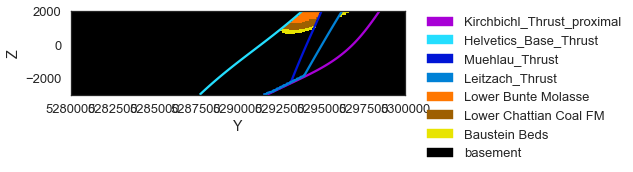

In [35]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=99, show_legend=True,
                    direction='x', show_data=False)

In [20]:
geo_model.series

,order_series,BottomRelation
Kirchbichl_Thrust_proximal,1,Fault
Helvetics_Thrust,2,Fault
Muehlau_Thrust,3,Fault
Leitzach_Thrust,4,Fault
Molasse,5,Erosion


In [21]:
gp.plot.plot_scalar_field(geo_model, , series=4, direction='x')

SyntaxError: invalid syntax (<ipython-input-21-8ff2bfec0e4a>, line 1)

In [22]:
ver, sim = gp.get_surfaces(geo_model)

In [ ]:
gp.plot.plot_3D(geo_model)

In [17]:
gp.save_model(geo_model, path='C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models')

True